# IMEC2201 Herramientas Computacionales 
## Semana 3: Interpolación y Curva de Bomba
### Clase 5: Interpolación

Universidad de los Andes — Abril 18, 2022.

---

## TABLA DE CONTENIDO

### Sección 1: Interpolación [→](#section1)
- 1.1. Cargar Librerías
- 1.2. Interpolación Lineal
- 1.3. Interpolación con Splines
- 1.4. Splines 1D
- 1.5. ¿Matemáticamente?
___

**¡Importante!** Note que la carpeta **week3** contiene dos archivos: `Project.toml` y `Manifest.toml`. Estos configuran el <font color="#FF5733">*ambiente de trabajo*</font> y facilitan el manejo de <font color="#FF5733">librerías</font>.

Para inicializar el ambiente desde Julia REPL, dentro de la carpeta **week3**, ejecute lo siguiente:

```shell
$ (v1.7) pkg > activate .
$ (week3) pkg> instantiate
```

**Nota:** Para acceder al Pkg REPL, escriba el corchete derecho `]` en el Julia REPL. Note que el REPL cambie de color de verde (Julia REPL) a azul (Pkg REPL). Una vez ejecutado el código `activate .`, el prefijo entre paréntesis indica el ambiente activo: cambia de `v1.7` a `week3`.

O, desde Jupyter Notebook, ejecute:

```julia
$ using Pkg
$ Pkg.activate()
$ Pkg.instantiate()
```

**Nota:** La activación del ambiente <font color="#FF5733">*precompila*</font> las librerías por lo que puede tardar un momento su ejecución completa.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería [`Pkg.jl`](https://pkgdocs.julialang.org/v1/environments/) y en el documento dando clic [aquí](https://towardsdatascience.com/how-to-setup-project-environments-in-julia-ec8ae73afe9c).
</div>

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating project at `~/Documents/GitHub/ua-imec2001-hc-202210/content/week3`


In [2]:
Pkg.status()

      Status `~/Documents/GitHub/ua-imec2001-hc-202210/content/week3/Project.toml`
  [336ed68f] CSV v0.10.4
  [a93c6f00] DataFrames v1.3.3
  [39dd38d3] Dierckx v0.5.2
  [a98d9a8b] Interpolations v0.13.6
  [91a5bcdd] Plots v1.27.5
  [fdbf4ff8] XLSX v0.7.9


<a id="section1"></a>
# Sección 1: Interpolación

La interpolación es el ejercicio de determinar una función $ f(x) $ que pase por un conjunto de puntos.

Típicamente, en los laboratorios de los cursos de Ingeniería Mecánica, se dispone de un número de datos obtenidos por muestreo a partir de un experimento y se pretende construir una función que los ajuste para así obtener nuevos puntos y precisar/expander el análisis.

**Nota:** La interpolación es diferente a la *regresión* dado que la última busca determinar una función que **describa** el modelo físico particular; es decir, una tendencia.

En general, vamos a utilizar la librería `Interpolations.jl` para explorar diferentes tipos de interpolación.

## 1.1. Cargar Librerías

In [3]:
using Plots
using Interpolations

## 1.2. Interpolación Lineal

En este escenario, tenemos un par de puntos $(x_k,\:y_k)$ y se quiere conocer el valor de $y$ para un valor cualquiera de $x$ en el intervalo $[x_0, x_1, ..., x_n]$.

El ejercicio consiste en determinar la recta que pasa por dos puntos continuos, es decir, en el intervalo $[x_k, \:x_{k+1}]$.

El modelo matemático para un par de puntos $(x_a,\:y_a)$ y $(x_b,\:y_b)$ es:

$$
y = y_a + (x - x_a) \cdot \frac{y_b - y_a}{x_b - x_a}
$$

Con la librería `Interpolations.jl` utilizamos la función `LinearInterpolation`. La sintaxis de esta función consiste en:

1. Definir el interpolador mediante `LinearInterpolation(x,y)`.
2. Ejecutar la función determinada por el interpolador en el conjunto de puntos independiente mediante.

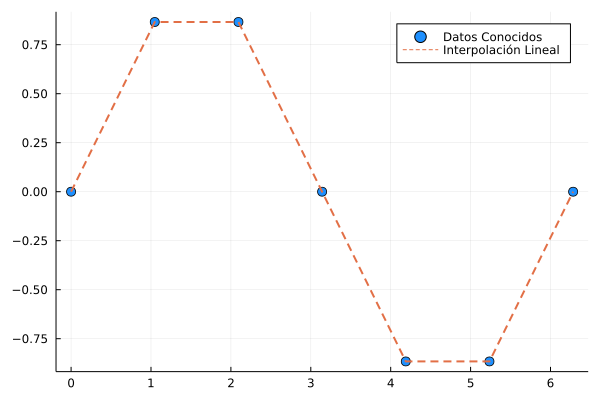

In [5]:
# Límite inferior y superior del intervalo
a = 0.0
b = 2π
ndatos = 7

# Definición del intervalo
x = collect(range(a, stop=b, length=ndatos))

# Función que originalmente desconocemos
y = sin.(x)

# Interpolación lineal
itp_lineal = LinearInterpolation(x, y)

# Ejecución del interpolador
f_lineal(x) = itp_lineal(x)

# Gráficas
plot(x, y, seriestype=:scatter, m=:circle, ms=5, mc=:dodgerblue, label="Datos Conocidos", legend=true)
plot!(x, f_lineal, seriestype=:line, ls=:dash, w=2, m=:none, ms=5, label="Interpolación Lineal", legend=true)

En este caso, si quisiera conocer el valor en un punto dado, debo utilizar la misma función, indicando el valor de interés, es decir: `LinearInterpolation(x)`.

In [6]:
x

7-element Vector{Float64}:
 0.0
 1.0471975511965976
 2.0943951023931953
 3.141592653589793
 4.1887902047863905
 5.235987755982989
 6.283185307179586

Para x = 2.5, el valor de y es 0.53.


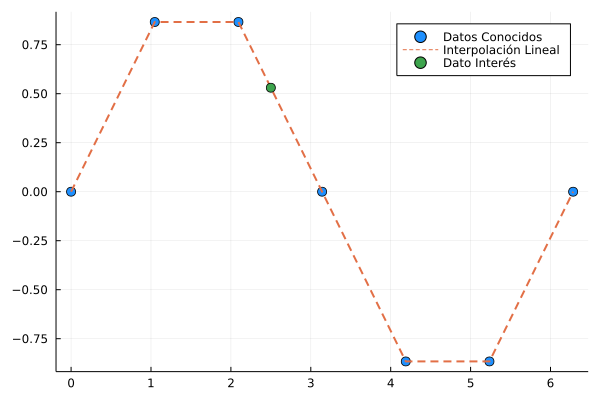

In [7]:
x_interes = 2.5
y_interes = itp_lineal(x_interes)

println("Para x = $(x_interes), el valor de y es $(round(y_interes, digits=2)).")

plot!([x_interes], [y_interes], seriestype=:scatter, m=:circle, ms=5, label="Dato Interés", legend=true)

Note lo que sucede si se aumenta el número de puntos del conjunto de datos conocidos.

In [8]:
# Intervalo para X_interes
function x_i(a, b, ndatos)
    Xs = range(a, stop=b, length=ndatos)
    xs = []
    
    for i in Xs
        push!(xs, i)
    end
    
    return xs
end

# Intervalo para Y_interes
function y_i(funct, a, b, ndatos)
    Xs = range(a, stop=b, length=ndatos)
    ys = []
    
    for i in Xs
        y = funct(i)
        push!(ys, y)
    end
    
    return ys
end

function funct(x)
    return sin.(x)
end

funct (generic function with 1 method)

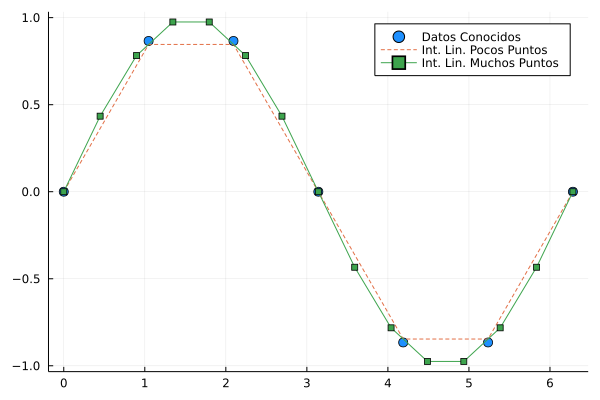

In [9]:
ndatos = 7

# Definición del intervalo
x = collect(range(a, stop=b, length=ndatos))

# Función que originalmente desconocemos
y = sin.(x)

# Gráfica teórica
plot(x, y, seriestype=:scatter, m=:circle, ms=5, mc=:dodgerblue, label="Datos Conocidos", legend=true)

# Interés
ndat = 15
x_int = x_i(a, b, ndat)
y_int = y_i(funct, a, b, ndat)

# Interpolación lineal
itp_lineal = LinearInterpolation(x_int, y_int)

# Ejecución del interpolador
f_lineal(x) = itp_lineal(x)

plot(x, y, seriestype=:scatter, m=:circle, ms=5, mc=:dodgerblue, label="Datos Conocidos", legend=true)
plot!(x, f_lineal, seriestype=:line, ls=:dash, w=1, m=:none, ms=5, label="Int. Lin. Pocos Puntos", legend=true)
plot!(x_int, f_lineal, seriestype=:line, ls=:solid, w=1, m=:rect, ms=3, label="Int. Lin. Muchos Puntos", legend=true)

Ahora, si en lugar de partir de una función utilizamos una nube de puntos (como típicamente es en un laboratorio), ¿cómo lo haríamos y qué obtendríamos?

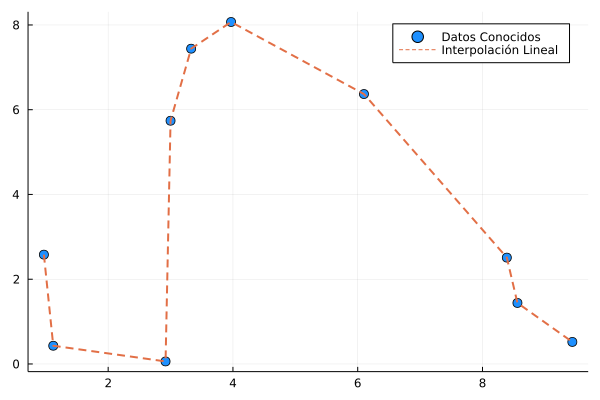

In [10]:
xx = [0.97, 1.12, 2.92, 3.00, 3.33, 3.97, 6.10, 8.39, 8.56, 9.44]
yy = [2.58, 0.43, 0.06, 5.74, 7.44, 8.07, 6.37, 2.51, 1.44, 0.52]

# Interpolación lineal
itp_lineal = LinearInterpolation(xx, yy)

# Ejecución del interpolador
f_lineal(x) = itp_lineal(x)

# Gráficas
plot(xx, yy, seriestype=:scatter, m=:circle, ms=5, mc=:dodgerblue, label="Datos Conocidos", legend=true)
plot!(xx, f_lineal, seriestype=:line, ls=:dash, w=2, m=:none, ms=5, label="Interpolación Lineal", legend=true)

Para xx = 5.3, el valor de yy es 7.01.


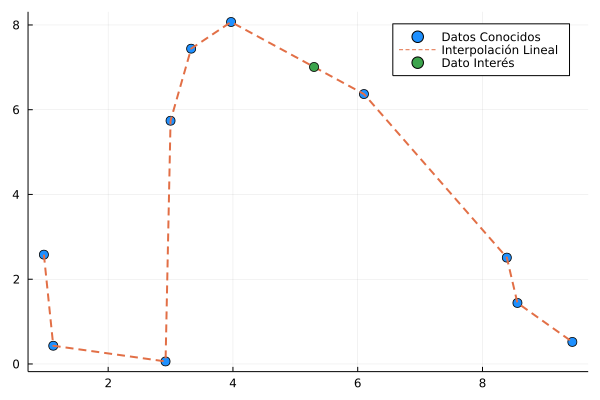

In [11]:
x_interes = 5.3
y_interes = itp_lineal(x_interes)

println("Para xx = $(x_interes), el valor de yy es $(round(y_interes, digits=2)).")

plot!([x_interes], [y_interes], seriestype=:scatter, m=:circle, ms=5, label="Dato Interés", legend=true)

## 1.3. Interpolación con Splines

Un *spline* es una curva suave definida en partes mediante diferentes polinomios.

En interpolación, los *splines* dan lugar a buenos resultados para formas complicadas requiriendo solamente el uso de polinomios de bajo grado, evitando así las oscilaciones indeseables que se dan al interpolar mediante polinomios de grado elevado.

Con la librería `Interpolations.jl` utilizamos la función `BSplines`. Como mencionamos que los *splines* se definen a partir de polinomios, es necesario establecer el grado de la función (equivalente al grado del polinomio). Con la librería `Interpolations.jl` podemos definir los siguientes grados a los *splines*: `Constant`, `Linear`, `Quadratic`, y `Cubic`, correspondiendo a grados 0, 1, 2 y 3, respectivamente.

**Nota:** No es recomendable utilizar polinómios de grado mayor a 3 ya que se hacen cada vez más sensibles a los valores extremos con lo que datos erróneo puede generar distorsiones considerables.

Si se tienen solo dos puntos, el polinomio que pasa por estos es de grado uno, es decir, una recta. Si se tienen tres puntos, el polinomio es de segundo grado, es decir, unaparábola. Por tanto, en el caso general de tener $n$ puntos, el polinomio sería de grado $n-1$, es decir:

$$
y = a_0 x^{n-1} + a_1 x^{n-2} + ... + a_{n-2} x + a_{n-1}
$$

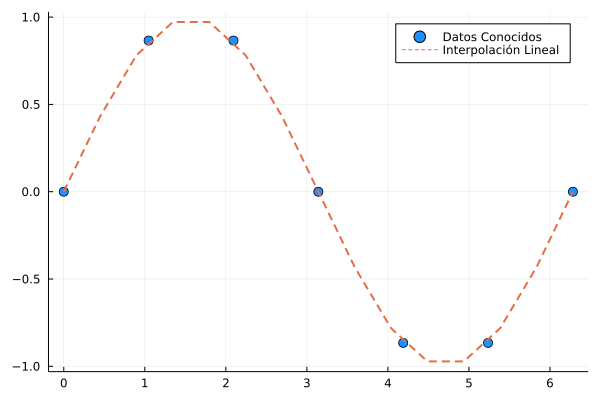

In [12]:
# Límite inferior y superior del intervalo
a = 0.0
b = 2π
ndatos = 7

# Definición del intervalo
x = collect(range(a, stop=b, length=ndatos))

# Función que originalmente desconocemos
y = sin.(x)

# Interpolación lineal
itp_cubic = CubicSplineInterpolation(range(a, stop=b, length=ndatos), y)

# Ejecución del interpolador
f_cubic(x) = itp_cubic(x)

# Gráficas
plot(x, y, seriestype=:scatter, m=:circle, ms=5, mc=:dodgerblue, label="Datos Conocidos", legend=true)
plot!(range(a, stop=b, length=15), f_cubic, seriestype=:line, ls=:dash, w=2, m=:none, ms=5, label="Interpolación Lineal", legend=true)

Para x = 2.5, el valor de y es 0.6.


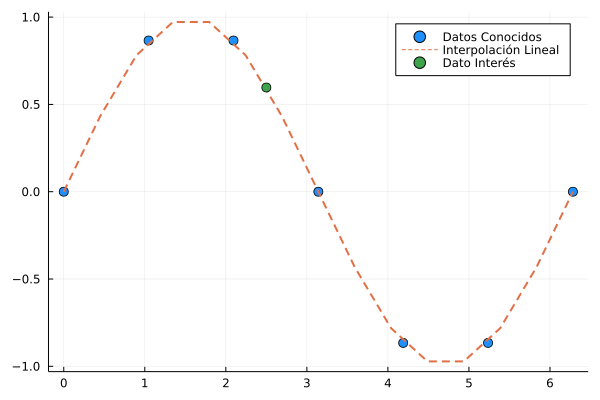

In [13]:
x_interes = 2.5
y_interes = itp_cubic(x_interes)

println("Para x = $(x_interes), el valor de y es $(round(y_interes, digits=2)).")

plot!([x_interes], [y_interes], seriestype=:scatter, m=:circle, ms=5, label="Dato Interés", legend=true)

## 1.4. Splines 1D 

In [14]:
using Dierckx

# Límite inferior y superior del intervalo
a = 0.0
b = 2π
ndatos = 7

# Definición del intervalo
x = collect(range(a, stop=b, length=ndatos))

# Función que originalmente desconocemos
y = sin.(x)

# Spline 1D
spl = Spline1D(x, y)

spl(2.5)

0.5996393766950543

## 1.5. ¿Matemáticamente?

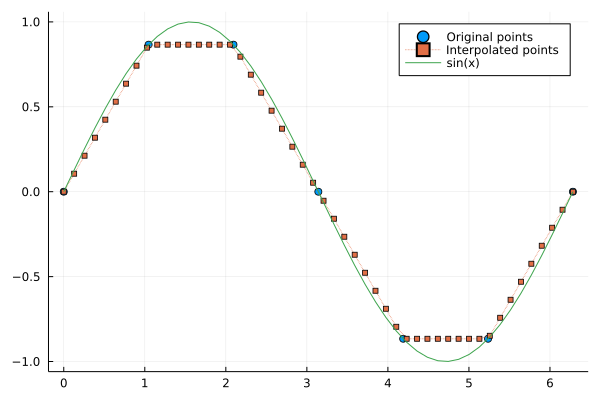

In [15]:
# Tomado de Ferreira (2016), Introduction to Computational Physics, Ch. 2. 
xlst = collect(range(0, stop=2π, length=7));
flst = sin.(xlst);

# Receives number of points n (odd) to interpolate # and the original data via x and f
function interp1(n, x, f)
    xnew = collect(range(x[1], stop=x[end], length=n)); # Creates new axes
    fnew = zeros(n); # Initialize new data as zero
    
    i = 1; # Label new sites
    for j=1:(length(x)-1) # Runs over old sites
        xa = x[j]; # Known points
        xb = x[j+1];
        
        fa = f[j]; # Known data
        fb = f[j+1];
        
        # Matrix form to find the coefficients
        M = [xa 1.0; xb 1.0]; # Ax = B
        C1, C0 = inv(M)*[fa; fb];
        
        # Calculate the new data within every two points interval
        while i <= n && xnew[i] <= xb
            fnew[i] = C1*xnew[i] + C0;
            i += 1;
        end
    end
    return xnew, fnew; # Return interpolated data
end

# Calls function to interpolate
xnew, fnew = interp1(50, xlst, flst);

# Plot old data, new data, and exact function
plot(xlst, flst, seriestype=:scatter, m=:circle, ms=4, label="Original points")
plot!(xnew, fnew, seriestype=:line, ls=:dot, m=:rect, ms=2.5, label="Interpolated points")
plot!(xnew, sin.(xnew), seriestype=:line, m=:none, ms=4, label="sin(x)")